In [48]:
import numpy as np 
import matplotlib.pyplot as plt
import netCDF4 as nc
import scipy.stats as stat

In [75]:
# Set the font size
plt.rcParams['font.size'] = 12

# Set the font family
plt.rcParams['font.family'] = 'sans-serif'

# Optionally, you can specify the specific font you want to use
plt.rcParams['font.sans-serif'] = 'Arial'

# You can also set other font properties
plt.rcParams['font.weight'] = 'bold'

# Any other global settings for ticks, labels, titles, etc.
plt.rcParams['axes.labelsize'] = 12  # For x and y labels
plt.rcParams['axes.titlesize'] = 14  # For plot title
plt.rcParams['xtick.labelsize'] = 10 # For x-axis tick labels
plt.rcParams['ytick.labelsize'] = 10 # For y-axis tick labels

In [2]:
nc_file_path = 'C:\Phd\Objective Analysis\Homeworks\HW1\Data\TS_timeseries_cesmle_1850.nc'
TS_cesmle_1850_nc = nc.Dataset(nc_file_path, 'r')
nc_file_path = 'C:\Phd\Objective Analysis\Homeworks\HW1\Data\TS_timeseries_cesmle_1920_2100.nc'
TS_cesmle_1920_2100_nc = nc.Dataset(nc_file_path, 'r')
type(TS_cesmle_1850_nc)

netCDF4._netCDF4.Dataset

In [3]:
print(TS_cesmle_1850_nc.ncattrs())
print("--- Global Attributes ---")
for attr in TS_cesmle_1850_nc.ncattrs():
    print(f"{attr}: {TS_cesmle_1850_nc.getncattr(attr)}")

print("\n--- Dimensions ---")
for dim in TS_cesmle_1850_nc.dimensions:
    print(f"{dim}: {TS_cesmle_1850_nc.dimensions[dim].size}")

for dim in TS_cesmle_1850_nc.dimensions.values():
    print(dim)
    
# for 1920_2100
print(TS_cesmle_1920_2100_nc.ncattrs())
print("--- Global Attributes ---")
for attr in TS_cesmle_1920_2100_nc.ncattrs():
    print(f"{attr}: {TS_cesmle_1920_2100_nc.getncattr(attr)}")
    
print("\n--- Dimensions ---")
for dim in TS_cesmle_1920_2100_nc.dimensions:
    print(f"{dim}: {TS_cesmle_1920_2100_nc.dimensions[dim].size}")

for dim in TS_cesmle_1920_2100_nc.dimensions.values():
    print(dim)
    

['case', 'creation_date', 'source']
--- Global Attributes ---
case: b.e11.B1850C5CN.f09_g16.005
creation_date: Tue Aug  1 14:00:02 MDT 2017
source: CESMLE_timeseries.ncl

--- Dimensions ---
case: 0
year: 1801
<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'case', size = 0
<class 'netCDF4._netCDF4.Dimension'>: name = 'year', size = 1801
['case', 'creation_date', 'source']
--- Global Attributes ---
case: CESM-LE members 1-30
creation_date: Tue Aug  1 14:17:35 MDT 2017
source: ATOC4500_hw5_timeseries.ncl

--- Dimensions ---
case: 0
member: 30
year: 181
<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'case', size = 0
<class 'netCDF4._netCDF4.Dimension'>: name = 'member', size = 30
<class 'netCDF4._netCDF4.Dimension'>: name = 'year', size = 181


In [4]:
TS_cesmle_1920_2100_nc.variables.keys()

dict_keys(['gts_ann_allcesmle', 'member', 'year', 'ats_ann_allcesmle'])

In [5]:
TS_cesmle_1850_nc.variables.keys()

dict_keys(['gts_annual', 'year', 'ats_annual'])

In [6]:
# transform the nc file to a numpy array
# for 1850
gts_annual_1850 = TS_cesmle_1850_nc.variables['gts_annual']
gts_annual_1850_np = gts_annual_1850[:]
np.size(gts_annual_1850_np)



1801

In [7]:
# for 1920_2100
gts_annual_1920_2100 = TS_cesmle_1920_2100_nc.variables['gts_ann_allcesmle']
gts_annual_1920_2100_np = gts_annual_1920_2100[0]
np.size(gts_annual_1920_2100_np)

181

In [8]:
x2 = np.linspace(1920,2100,181)
print(x2[0],x2[-1])

1920.0 2100.0


In [17]:
x1 = np.linspace(1850-1801+1,1850,1801)
print(x1[0],x1[-1])
# combining x1 as the year for gts_annual_1850_np
print(x1)
x2 = np.linspace(1920,2100,181)
print(x2)
[np.size(x1), np.size(gts_annual_1850_np)]
[np.size(x2), np.size(gts_annual_1920_2100_np)]

50.0 1850.0
[  50.   51.   52. ... 1848. 1849. 1850.]
[1920. 1921. 1922. 1923. 1924. 1925. 1926. 1927. 1928. 1929. 1930. 1931.
 1932. 1933. 1934. 1935. 1936. 1937. 1938. 1939. 1940. 1941. 1942. 1943.
 1944. 1945. 1946. 1947. 1948. 1949. 1950. 1951. 1952. 1953. 1954. 1955.
 1956. 1957. 1958. 1959. 1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967.
 1968. 1969. 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979.
 1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.
 2016. 2017. 2018. 2019. 2020. 2021. 2022. 2023. 2024. 2025. 2026. 2027.
 2028. 2029. 2030. 2031. 2032. 2033. 2034. 2035. 2036. 2037. 2038. 2039.
 2040. 2041. 2042. 2043. 2044. 2045. 2046. 2047. 2048. 2049. 2050. 2051.
 2052. 2053. 2054. 2055. 2056. 2057. 2058. 2059. 2060. 2061. 2062. 2063.
 2064. 2065. 2066. 2067. 2068. 2069. 2070. 2071. 2072. 2073. 2074. 207

[181, 181]

In [10]:
test = np.column_stack((x1, gts_annual_1850_np))
print(test)
year_to_temp_dict = {row[0]: row[1] for row in test}
year_to_temp_dict(1850)

[[  50.          286.95007324]
 [  51.          286.96374512]
 [  52.          287.02700806]
 ...
 [1848.          287.0050354 ]
 [1849.          287.1741333 ]
 [1850.          287.11630249]]


TypeError: 'dict' object is not callable

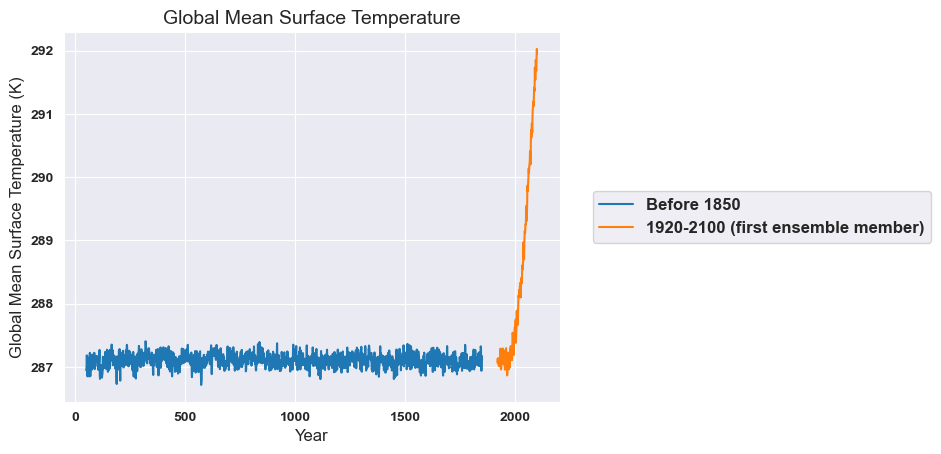

In [91]:
#plot gts_annual
plt.plot(x1, gts_annual_1850_np)
plt.plot(x2, gts_annual_1920_2100_np)
plt.xlabel('Year')
plt.ylabel('Global Mean Surface Temperature (K)')
plt.title('Global Mean Surface Temperature')
plt.legend(['Before 1850', '1920-2100 (first ensemble member)'], loc = 'center left', bbox_to_anchor=(1.05, 0.5))
#save the plot
plt.savefig('3-3-2.png', bbox_inches='tight')
plt.show()

In [63]:
# standardizeing the gts_annual
gts_annual_1850_standard = ((gts_annual_1850_np - np.mean(gts_annual_1850_np)) / np.std(gts_annual_1850_np))


(array([0.04023515, 0.12875249, 0.3703272 , 1.46455959, 2.84864888,
        3.79015147, 3.16248308, 1.87578779, 0.66790355, 0.14484655]),
 array([286.7170105 , 286.78601074, 286.85501099, 286.92398071,
        286.99298096, 287.0619812 , 287.13098145, 287.19998169,
        287.26895142, 287.33795166, 287.4069519 ]),
 <BarContainer object of 10 artists>)

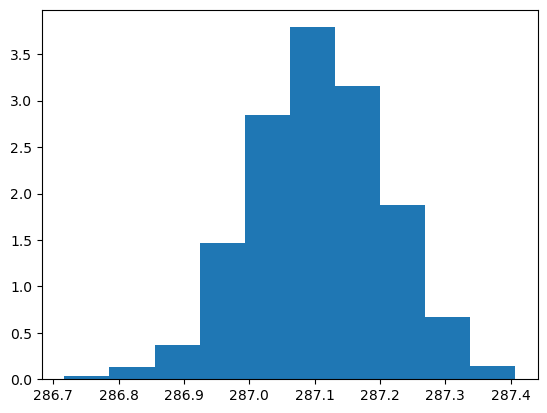

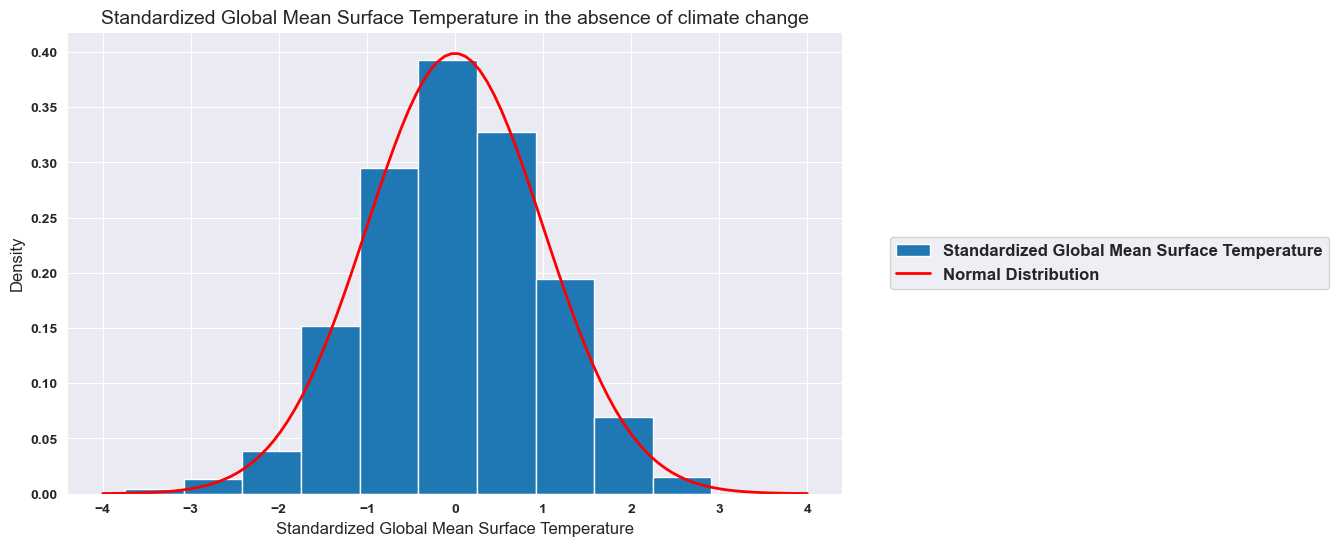

In [89]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.hist(gts_annual_1850_standard, density=True, label='Standardized Global Mean Surface Temperature')
#plot a standard normal distribution
x = np.linspace(-4, 4, 100)
y = (1/np.sqrt(2*np.pi)) * np.exp(-0.5*x**2)
plt.plot(x, y, 'r', linewidth=2, label='Normal Distribution')
plt.xlabel('Standardized Global Mean Surface Temperature')
plt.ylabel('Density')
plt.title('Standardized Global Mean Surface Temperature in the absence of climate change')
plt.legend(loc = 'center left', bbox_to_anchor=(1.05, 0.5))
#save the plot
plt.savefig('3-3-1.png', bbox_inches='tight')

plt.show()

Estimating Present-Day Global Mean Surface Temperature in each ensemble member of CESM Large Ensemble over 1990to 2019

In [77]:
# print mean and standard deviation of gts_annual_1850_np
print(np.mean(gts_annual_1850_np), np.std(gts_annual_1850_np))

287.10522 0.103609964


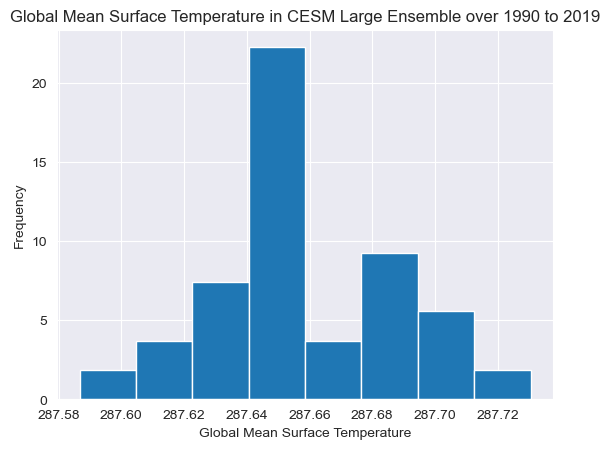

In [27]:
# for 1990-2019 from gts_annual_1920_2100_np
# x2 is the year for gts_annual_1920_2100_np
# gts_annual_1920_2100_np is the global mean surface temperature
# gts_annual_1920_2100_np[70:100] is the global mean surface temperature from 1990 to 2019
mean_temp_1990_2019 = np.zeros(30)
for n in range(0, 30):
    mean_temp_1990_2019[n] = np.mean(gts_annual_1920_2100[n][70:100])
fig, ax = plt.subplots()
ax.hist(mean_temp_1990_2019, bins=8, density=True)
ax.set_xlabel('Global Mean Surface Temperature')
ax.set_ylabel('Frequency')
ax.set_title('Global Mean Surface Temperature in CESM Large Ensemble over 1990 to 2019')
plt.show()

In [58]:
print(mean_temp_1990_2019[0])


287.6737365722656


In [61]:
x2[70], x2[100]

(1990.0, 2020.0)

In [30]:
# How odd is the data for the first ensemble member?
# for the first ensemble member
# gts_annual_1920_2100_np[0] is the global mean surface temperature
print(gts_annual_1850_np,gts_annual_1920_2100_np[0])

SyntaxError: invalid syntax (4107026359.py, line 2)

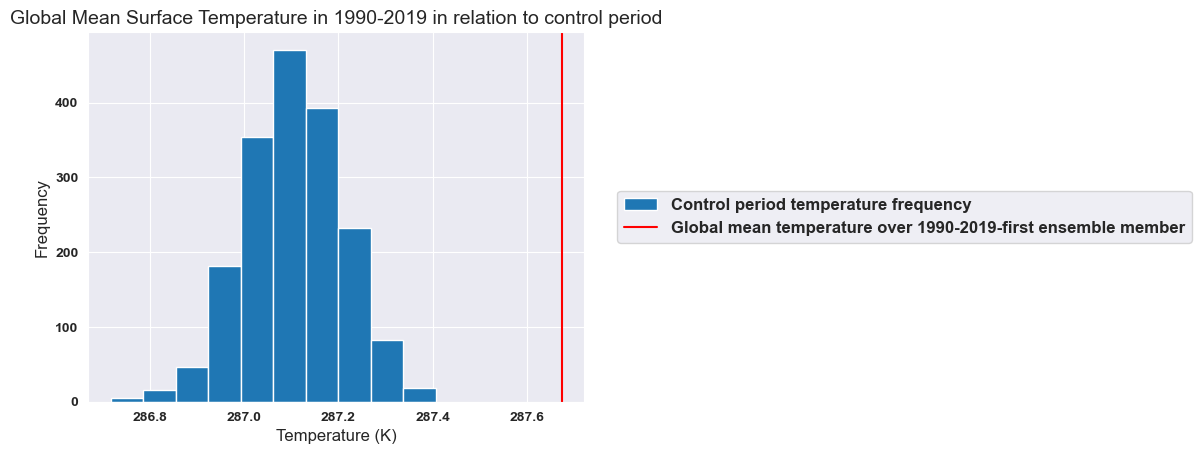

In [87]:
# histogram of gts_annual
plt.hist(gts_annual_1850_np, label='Control period temperature frequency') 
# make a line as the mean of gts_annual in 1920-2100 first ensemble member
plt.axvline(x=mean_temp_1990_2019[0], color='r', label='Global mean temperature over 1990-2019-first ensemble member')
plt.xlabel('Temperature (K)')
plt.ylabel('Frequency')
plt.title('Global Mean Surface Temperature in 1990-2019 in relation to control period')
plt.legend(loc = 'center left', bbox_to_anchor=(1.05, 0.5))
#save the plot
plt.savefig('3-1-3.png', bbox_inches='tight')
plt.show()

In [ ]:

# plt.scatter(gts_annual_1920_2100_np[0], 0.01, color='r')

0 287.04241943359375
1 287.0980529785156
2 287.02093505859375
3 287.1194152832031
4 287.0688781738281
5 287.1048583984375
6 287.1690673828125
7 287.0513916015625
8 287.1209716796875
9 287.18609619140625
10 287.0856018066406
11 287.1730651855469
12 287.13482666015625
13 287.05401611328125
14 287.1168212890625
15 287.1687927246094
16 287.08001708984375
17 287.0318603515625
18 287.1470031738281
19 287.1859436035156
20 287.1019287109375
21 287.11871337890625
22 287.12713623046875
23 287.1050109863281
24 287.1402893066406
25 287.11688232421875
26 287.19708251953125
27 287.10430908203125
28 287.1093444824219
29 287.0596008300781
30 287.0994567871094
31 287.1407165527344
32 287.1216125488281
33 287.0556640625
34 287.1246337890625
35 287.04327392578125
36 287.0956726074219
37 287.0831298828125
38 287.0963134765625
39 287.08123779296875
40 287.1287536621094
41 287.1675720214844
42 287.13037109375
43 287.0766906738281
44 287.09075927734375
45 287.0804138183594
46 287.0185241699219
47 287.0983276

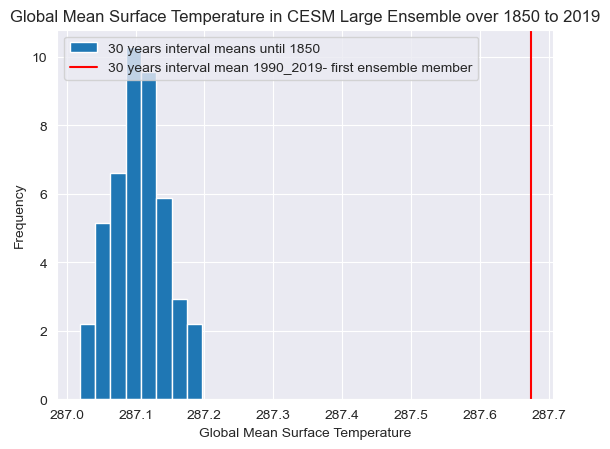

In [46]:
# reaasemble the data from gts_annual_1850_np in 30 years interval
# gts_annual_1850_np is the global mean surface temperature
# x1 is the year for gts_annual_1850_np
mean_temp_1850_30years = np.zeros(int(x1[-1]//30))
for n in range(0, int(x1[-1]//30)):
    mean_temp_1850_30years[n] = np.mean(gts_annual_1850_np[n*30:(n+1)*30])
    print(n, mean_temp_1850_30years[n])
fig, ax = plt.subplots()
ax.hist(mean_temp_1850_30years, bins=8, density=True, label='30 years interval means until 1850')
ax.set_xlabel('Global Mean Surface Temperature')
ax.set_ylabel('Frequency')
ax.set_title('Global Mean Surface Temperature in CESM Large Ensemble over 1850 to 2019')
plt.axvline(x=mean_temp_1990_2019[0], color='r', label='30 years interval mean 1990_2019- first ensemble member')
plt.legend()
plt.show()

In [88]:
# checking how odd is the data for the first ensemble member
print(mean_temp_1990_2019[0])
#doing a t-test to check if the mean of the first ensemble member is significantly different from the mean of the 30 years interval



287.6737365722656


In [49]:
# 
prob = 1 - stat.t.cdf(mean_temp_1990_2019[0], len(mean_temp_1850_30years)-1, loc=np.mean(mean_temp_1850_30years), scale=np.std(mean_temp_1850_30years))
print(prob)



    

0.0


In [53]:
prob_all = np.zeros(30)
for n in range(0, 30):
    prob_all[n] = 1 - stat.t.cdf(mean_temp_1990_2019[n], len(mean_temp_1850_30years)-1, loc=np.mean(mean_temp_1850_30years), scale=np.std(mean_temp_1850_30years))  #???????

In [57]:
print(prob_all)
print(np.size(prob_all))
print(np.mean(prob_all))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
30
0.0


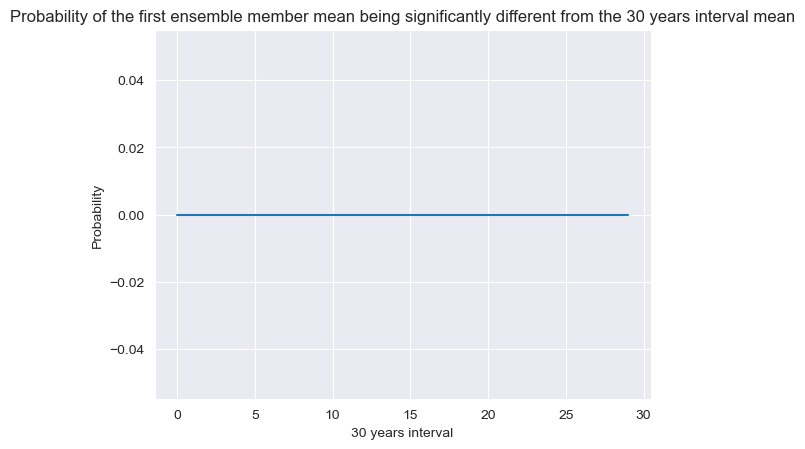

In [54]:
fig, ax = plt.subplots()
ax.plot(prob_all)
ax.set_xlabel('30 years interval')
ax.set_ylabel('Probability')
ax.set_title('Probability of the first ensemble member mean being significantly different from the 30 years interval mean')
plt.show()
